####作成したモデルによる学習

1. YOLOv5の取得
1. 学習済みモデルの読み込み
1. 画像で位置検出をする
1. 結果の確認

In [22]:
!pip install jedi>=0.10 # 202302 追加
!pip install imageio==2.31.4
!pip install pillow==10.3.0

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1.YOLOv5の取得
学習の時と同じく、YOLOv5を取得します。  
Google Colabが使うたびに、リセットされているためです。

In [24]:
!pip install jedi>=0.10 # 202302 追加

In [25]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
%pip install -qr requirements.txt  # install

fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


#### 2.学習済みモデルの読み込み
次に学習した結果を読み込む必要があります。  
学習済みの結果は、プロジェクトの保存先の「weights」フォルダの中の「best.pt」になります。

<img src="https://itoishoukai.com/od_course/3-2-6-image1.png">

下記のコードの「project_dir」には、学習時に指定していたのと同じものを  
「weights_dir」には、使いたい学習結果のものを指定してください。  
expは学習するたびに番号がついて増えていますので、注意してください。

In [26]:
project_dir = "/content/drive/MyDrive/detection/exps/"
weights_dir = project_dir + "exp/weights/best.pt"

In [27]:
import torch
# localにあるYOLOリポジトリを指定します
# 参考：https://github.com/ultralytics/yolov5/issues/5733
model = torch.hub.load('/content/yolov5', 'custom', path=weights_dir, source='local')

YOLOv5 🚀 v7.0-350-g6096750f Python-3.10.12 torch-2.3.1+cu121 CPU

Fusing layers... 
YOLOv5m summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


#### 3.画像で位置検出をする
vocデータで学習された方は、特に変更なくそのまま実行すると、バスの画像で位置検出します。  
自身のデータで試されたい場合は、左のファイルパネルに直接ドラッグ＆ドロップしてください。  
下記事例では、test.JPGというファイルを置いています。
その後、voc_data = Falseにして、else下のfile_nameを変更してください。  

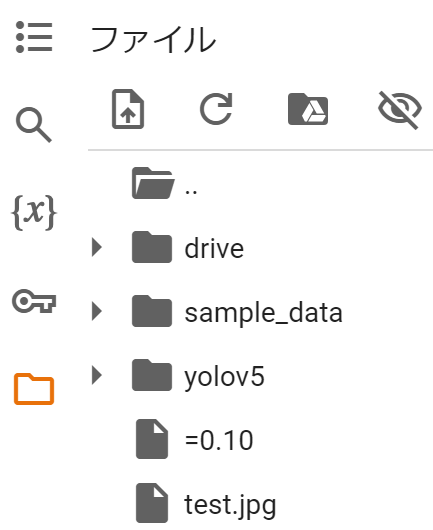

今回は1つの画像だけを位置検出しますが、Listに複数入れてまとめて処理させることもできます  

In [28]:
voc_data = False
if voc_data:
  base_url = 'https://github.com/ultralytics/yolov5/raw/master/data/images/'
  file_name = 'bus.jpg'
  image_url = base_url + file_name
  # 2024/05/02 追加
  torch.hub.download_url_to_file(image_url, file_name)
  image_url = '/content/' + file_name
else:
  base_url = '/content/'
  file_name = 'test.jpg'
  image_url = base_url + file_name

# 推論の実行
model.conf = 0.3
# 2024/05/02 変更
results = model(image_url)
# import cv2
# results = model(cv2.imread(image_url))

In [29]:
import shutil
import os
os.chdir("/content")
if os.path.exists('runs'):
  shutil.rmtree('runs')
# 結果保存
results.save()

Saved 1 image to runs/detect/exp


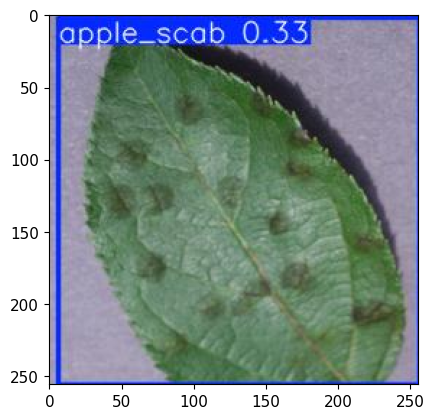

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
img = cv2.cvtColor(cv2.imread(f"runs/detect/exp/{file_name}"), cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(cv2.imread(f"test.jpg"), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

#### 4.結果の確認
AIが予測した結果のデータを確認します。  
printメソッドを使うと、検出した結果と処理速度が表示されます。  

In [31]:
results.print()

image 1/1: 256x256 1 apple_scab
Speed: 11.7ms pre-process, 1196.6ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


座標を確認します。  
座標はxyxyに入っていますが、一枚の場合、最初のデータということで[0]を指定します。  
複数枚処理した場合は、見たいデータのindexを指定します。

In [32]:
# Data
# x1, y1, x2, y2, confidence, class
print('\n', results.xyxy[0])


 tensor([[  6.36552,   2.04813, 256.00000, 256.00000,   0.32991,   0.00000]])
